In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from workflow.scores.ospa import ospa_single
from workflow.scores.scp import scp_single

In [2]:
nt = 40

xfull = 1792/2
yfull = 1344/2

patch = 224
margin = 20.


rmax = 60.
rmin = 2.

resx = 0.9
resr = 0.9

eff = 0.9
fake = 0.1
dup = 0.5

ct = 'g'
cp = 'r'

In [3]:
# Simulate true craters
xt = (xfull)*np.random.random(nt)
yt = (yfull)*np.random.random(nt)
rt = np.abs((rmax-rmin)*np.random.random(nt)+rmin)

In [4]:
# Simulate detected craters, drop some
xp = (xt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)]
yp = (yt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)]
rp = np.abs((rt+2.*resr*(np.random.random(nt)-0.5))[:int(nt*eff)])

# Add fake detected craters
xp = np.append(xp,(xfull)*np.random.random(int(nt*fake)),0)
yp = np.append(yp,(yfull)*np.random.random(int(nt*fake)),0)
rp = np.abs(np.append(rp,(rmax-rmin)*np.random.random(int(nt*fake))+rmin,0))

# Add duplicate craters
xp = np.append(xp,(xt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)-int(nt*(1.-dup))])
yp = np.append(yp,(yt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)-int(nt*(1.-dup))])
rp = np.abs(np.append(rp,(rt+2.*resr*(np.random.random(nt)-0.5))[:int(nt*eff)-int(nt*(1.-dup))]))


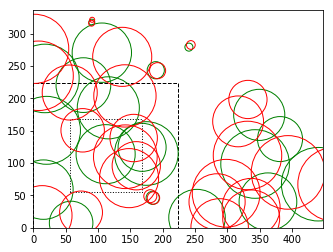

In [5]:
ax = plt.gca()
ax.cla() # clear things for fresh plot

detectpatch = plt.Rectangle((0,0), patch, patch, fill=False, linestyle = 'dashed')
ax.add_artist(detectpatch)

scorepatch = plt.Rectangle((patch/4, patch/4), patch/2, patch/2, fill=False, linestyle = 'dotted')
ax.add_artist(scorepatch)

for (x,y),r in zip(zip(xt,yt),rt):
    circle = plt.Circle((x, y), r, fill=False,color=ct)
    ax.add_artist(circle)
    
for (x,y),r in zip(zip(xp,yp),rp):
    circle = plt.Circle((x, y), r, fill=False,color=cp)
    ax.add_artist(circle)

plt.axes().set_aspect('equal')
ax.set_xlim([0,xfull])
ax.set_ylim([0,yfull])
plt.show()  


In [6]:
# Combine columns
y_true = np.array([xt,yt,rt]).T
y_pred = np.array([xp,yp,rp]).T

Score of the patch :  0.808004273642


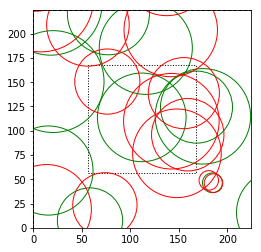

Score of the patch :  0.380731536806


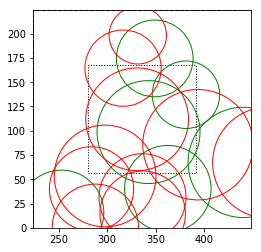

Score of the patch :  0.503024391913


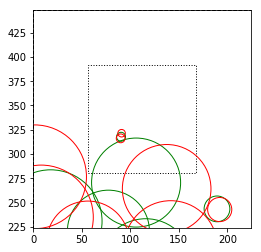

Score of the patch :  0


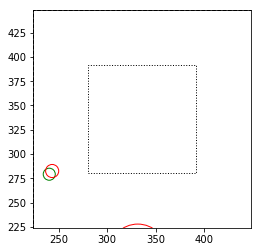

In [7]:
# Divide the canvas using given parameters

patch = 224
margin = patch/4
xpatch = np.arange(0,xfull,patch)
ypatch = np.arange(0,yfull,patch)

score_ospa = 0.
score_ospa_ref = 0.

for y in ypatch:
    for x in xpatch:

        # Strip edges

        xwindowmin = x+margin
        xwindowmax = x+patch-margin

        ywindowmin = y+margin
        ywindowmax = y+patch-margin

        y_true_patch = y_true[(y_true[:,0]>= xwindowmin) & (y_true[:,0] < xwindowmax) & (y_true[:,1]>= ywindowmin) & (y_true[:,1] < ywindowmax)]
        y_pred_patch = y_pred[(y_pred[:,0]>= xwindowmin) & (y_pred[:,0] < xwindowmax) & (y_pred[:,1]>= ywindowmin) & (y_pred[:,1] < ywindowmax)]

        # Score
        score_patch = ospa_single(y_true_patch,y_pred_patch)
        print("Score of the patch : ",score_patch)
        score_ospa += ospa_single(y_true_patch,y_pred_patch)
        score_ospa_ref += ospa_single(y_pred_patch,y_true_patch)

        ax = plt.gca()
        ax.cla() # clear things for fresh plot

        detectpatch = plt.Rectangle((x,y), patch, patch, fill=False, linestyle = 'dashed')
        ax.add_artist(detectpatch)

        scorepatch = plt.Rectangle((x+margin, y+margin), patch-2*margin, patch-2*margin, fill=False, linestyle = 'dotted')
        ax.add_artist(scorepatch)

        for (xc,yc),r in zip(zip(xt,yt),rt):
            circle = plt.Circle((xc, yc), r, fill=False,color=ct)
            ax.add_artist(circle)

        for (xc,yc),r in zip(zip(xp,yp),rp):
            circle = plt.Circle((xc, yc), r, fill=False,color=cp)
            ax.add_artist(circle)

        plt.axes().set_aspect('equal')
        ax.set_xlim([x,x+patch])
        ax.set_ylim([y,y+patch])
        plt.show()  


In [8]:
xpatch

array([   0.,  224.])

In [9]:
ypatch

array([   0.,  224.])

In [10]:
score_ospa

1.6917602023613332

In [11]:
score_ospa_ref

1.6917602023613332

In [19]:
# Score
ospa_single(y_true,y_pred)

0.97583207561085283

In [20]:
ospa_single(y_pred,y_true)

0.97583207561085283

In [21]:
mask_detection(y_true,y_pred)

0.78027812895069548

In [22]:
mask_detection(y_pred,y_true)

0.78027812895069548